In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly
import plotly.graph_objs as go

#**ЗАГРУЗКА ДАННЫХ**

In [ ]:
%%capture
!wget https://www.dropbox.com/s/uovw5h6y4kajos7/train.csv?dl=0 

In [ ]:
df_train = pd.read_csv('train.csv?dl=0') #обучающая выборка

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
#df_train.info()

In [ ]:
%%capture
!wget https://www.dropbox.com/s/nkjeex0l7k10e7r/test.csv?dl=0

In [ ]:
df_test = pd.read_csv('test.csv?dl=0') #тестовая (контрольная выборка)

In [ ]:
df_test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [ ]:
#df_test.info()

In [ ]:
%%capture
!wget https://www.dropbox.com/s/1phgwckd1f1z2ov/sample_submission.csv?dl=0

In [ ]:
df_sample = pd.read_csv('sample_submission.csv?dl=0') #пример отображения итогового результата

In [ ]:
df_sample.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [ ]:
#df_sample.info()

#**ПЕРВИЧНАЯ ОБРАБОТКА**

##Изучение признаков

In [ ]:
df_train.info() #обучающая выборка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Изучение месторасположения домовладений обучающей выборки

In [ ]:
city = pd.DataFrame({'location':['Bloomington Heights (Blmngtn)', 'Bluestem (Blueste)', 'Briardale (BrDale)', 'Brookside (BrkSide)', 'Clear Creek (ClearCr)', 'College Creek (CollgCr)', 'Crawford (Crawfor)',
                                 'Edwards (Edwards)', 'Gilbert (Gilbert)', 'Iowa DOT and Rail Road (IDOTRR)', 'Meadow Village (MeadowV)', 'Mitchell (Mitchel)', 'North Ames (Names)', 'Northridge (NoRidge)',
                                 'Northpark Villa (NPkVill)', 'Northridge Heights (NridgHt)', 'Northwest Ames (NWAmes)', 'Old Town (OldTown)', 'South & West of Iowa State University (SWISU)', 'Sawyer (Sawyer)',
                                 'Sawyer West (SawyerW)', 'Somerset (Somerst)', 'Stone Brook (StoneBr)', 'Timberland (Timber)', 'Veenker (Veenker)'],
                     'latitude':[40.4806, 41.7249, 40.7653, 33.6529, 39.6988, 37.2417, 41.5823, 38.5026, 42.1234, 41.8306, 29.4304, 43.7445, 42.0149, 34.2349, 37.2725, 48.2336,
                                 42.1813, 41.9154, 42.0276, 46.0094, 45.8470, 40.6334, 40.9629, 40.7834, 42.0441],
                     'longitude':[-89.0337, -88.0400, -89.6551, -86.9173, -105.6398, -76.7068, -74.3373, -88.0536, -88.3739, -90.2095, -98.6414, -98.0124, -93.6393, -118.5271, 
                                  -93.3696, -114.3325, -93.5598, -87.6409, -93.6462, -91.4260, -91.2406, -74.6298, -73.1450, -74.0512, -93.6486]})

In [ ]:
fig = go.Figure(go.Scattermapbox(lat=city['latitude'], lon=city['longitude'], text=city['location']))
map_center = go.layout.mapbox.Center(lat=(city['latitude'].max()+city['latitude'].min())/2, 
                                     lon=(city['longitude'].max()+city['longitude'].min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=3.5))
fig.show()

In [ ]:
import plotly.express as px
fig = px.strip(df_train['Neighborhood'])
fig.update_layout(
    height=500, width=1000,
    title="Распределение домовладений из обучающей выборки по месторасположению",
    title_x = 0.5,
    xaxis_title="Наименование местонахождения",
    yaxis_title="Количество домовладений",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [ ]:
df_train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [ ]:
values = df_train.groupby('Neighborhood').size().values
labels = df_train.groupby('Neighborhood').size().keys()

fig = go.Figure()
pull=0.03
fig.add_trace(go.Pie(values=values, labels=labels, pull=pull, hole=0.7))
fig.update_layout(
    height=500, width=1200,
    title="Распределение домовладений по местонахождению",
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend=dict(x=.5, xanchor="center", orientation="h"))
fig.show()

**ВЫВОД:** Из всех объектов обучающей выборки в Ames, Iowa расположены только 17,8% (261 объект: NWAmes-Northwest Ames, SWISU-South & West of Iowa State University, Veenker-Veenker)

Работа с категориальными признаками

In [ ]:
#кодируем категориальные признаки в числовые 

def number_encode_features(init_df_train):
    result = init_df_train.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column]) 
    return result, encoders

encoded_data_train, encoders = number_encode_features(df_train)
encoded_data_train.head() 

Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
0   1          60         3  ...         8              4     208500
1   2          20         3  ...         8              4     181500
2   3          60         3  ...         8              4     223500
3   4          70         3  ...         8              0     140000
4   5          60         3  ...         8              4     250000

[5 rows x 81 columns]

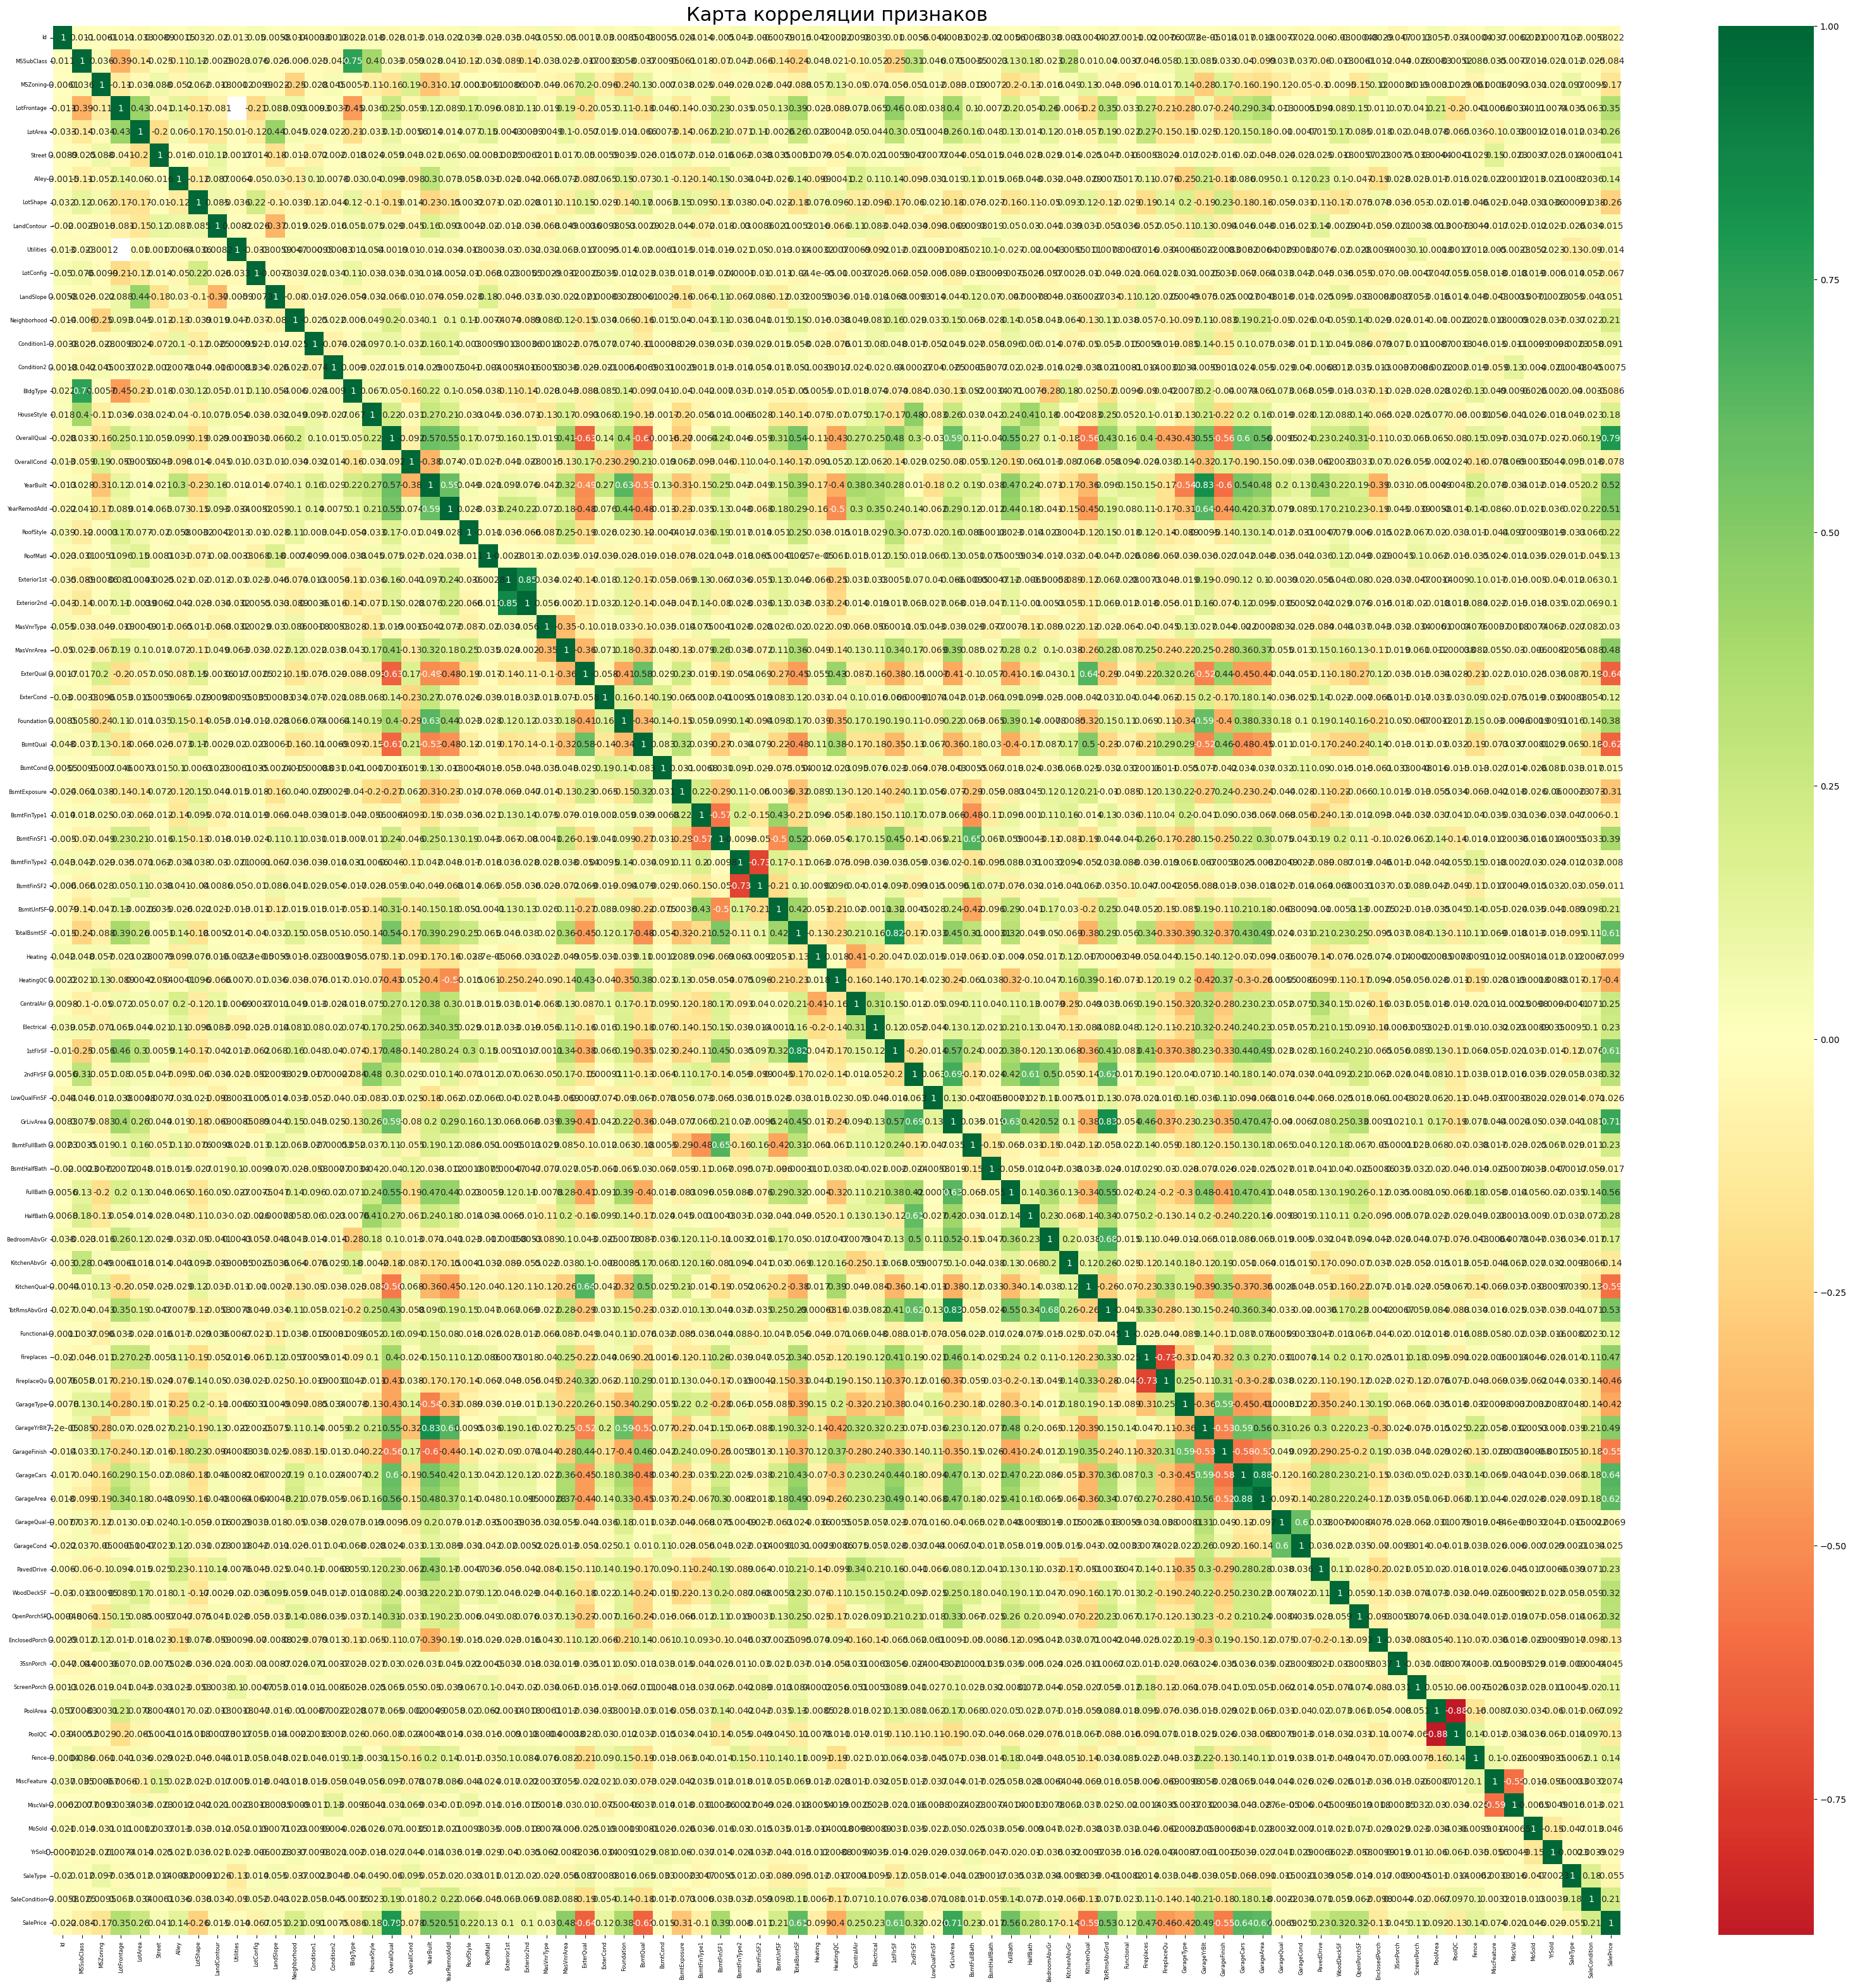

In [ ]:
plt.figure(figsize=(40,40), dpi= 100)
sns.heatmap(encoded_data_train.corr(), xticklabels=encoded_data_train.corr().columns, yticklabels=encoded_data_train.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Карта корреляции признаков', fontsize=22)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

Сравнение пар признаков наиболее и наименее зависимых с ценой домовладения


Положительная зависимость:
- OverallQual (общее состояние отделки дома)
- GrLivArea (Площадь помещений над землей)

In [ ]:
import plotly.express as px
fig = px.scatter(encoded_data_train, x='OverallQual', y='SalePrice')
fig.update_layout(
    height=500, width=1200,
    title="Сравнение стоимости и общего состояни домовладения",
    title_x = 0.5,
    xaxis_title="Общее состояние",
    yaxis_title="Стоимость",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(encoded_data_train, x='GrLivArea', y='SalePrice')
fig.update_layout(
    height=500, width=1200,
    title="Сравнение стоимости и площади помещений домовладения над землей",
    title_x = 0.5,
    xaxis_title="Площадь помещений над землей",
    yaxis_title="Стоимость",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Отрицательная зависмость:
- ExterQual (оценка качества материала снаружи дома)
- BsmtQual (Высота потолка в подвале)

In [ ]:
import plotly.express as px
fig = px.line(encoded_data_train, x='ExterQual', y='SalePrice', markers=True)
fig.update_layout(
    height=500, width=1200,
    title="Сравнение стоимости и оценкой качества материала наружной отделки домовладения",
    title_x = 0.5,
    xaxis_title="Качество материала отделки",
    yaxis_title="Стоимость",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(encoded_data_train, x='BsmtQual', y='SalePrice')
fig.update_layout(
    height=500, width=1200,
    title="Сравнение стоимости и высотой подвала домовладения",
    title_x = 0.5,
    xaxis_title="Высота подвала",
    yaxis_title="Стоимость",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Очищение выборки от значительных выбросов

In [ ]:
encoded_data_train=encoded_data_train.drop('SalePrice', axis=1) # удаляем столбец со стоимостью, так как она не имеет отношение к признакам домовладений

In [ ]:
import plotly.express as px
fig = px.box(encoded_data_train)
fig.update_layout(
    height=700, width=1500,
    title="Распределение признаков домовладений обучающей выборки",
    title_x = 0.5,
    xaxis_title="Наименование критерия",
    yaxis_title="Распределение",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [ ]:
encoded_data_train=encoded_data_train.drop('LotArea', axis=1) # удаляем столбец с признаком LotArea, имеющий значительный выброс

In [ ]:
fig = px.box(encoded_data_train)
fig.update_layout(
    height=700, width=1500,
    title="Распределение признаков домовладений обучающей выборки без 'LotArea'",
    title_x = 0.5,
    xaxis_title="Наименование критерия",
    yaxis_title="Распределение",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
fig.show()

##Подготовка обучающей выборки

In [ ]:
y_train=df_train['SalePrice'] # "ответы"
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
x_train=encoded_data_train # "признаки"
x_train

Id  MSSubClass  MSZoning  ...  YrSold  SaleType  SaleCondition
0        1          60         3  ...    2008         8              4
1        2          20         3  ...    2007         8              4
2        3          60         3  ...    2008         8              4
3        4          70         3  ...    2006         8              0
4        5          60         3  ...    2008         8              4
...    ...         ...       ...  ...     ...       ...            ...
1455  1456          60         3  ...    2007         8              4
1456  1457          20         3  ...    2010         8              4
1457  1458          70         3  ...    2010         8              4
1458  1459          20         3  ...    2010         8              4
1459  1460          20         3  ...    2008         8              4

[1460 rows x 79 columns]

##Подготовка контрольной выборки

In [ ]:
df_test.head() #контрольная выборка

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [ ]:
set(df_test.columns).difference(set(x_train.columns)) #сравнение столбцов контрольной и обучающей выборок

{'LotArea'}

In [ ]:
df_goal=df_test.drop('LotArea', axis=1) #удаление различий

In [ ]:
#кодирование категориальных значений тестовой выборки
def number_encode_features(init_df_goal): 
    result = init_df_goal.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column]) 
    return result, encoders

encoded_data_goal, encoders = number_encode_features(df_goal)
encoded_data_goal.head() 

Id  MSSubClass  MSZoning  ...  YrSold  SaleType  SaleCondition
0  1461          20         2  ...    2010         8              4
1  1462          20         3  ...    2010         8              4
2  1463          60         3  ...    2010         8              4
3  1464          60         3  ...    2010         8              4
4  1465         120         3  ...    2010         8              4

[5 rows x 79 columns]

In [ ]:
x_goal=encoded_data_goal # признаки целевой выборки 

##Подготовка выборок для применения алгоритмов


In [ ]:
X = x_train
y = y_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

*   ***X_train*** - выборка с обучающими признаками
*   ***y_train*** - выборка с обучающим результатом
*   ***X_test*** - выборка с контрольными признаками 
*   ***y_test*** - выборка с контрольным результатом
*   ***x_goal*** - целевая выборка для подготовки ответа

#**ОБУЧЕНИЕ** - АЛГОРИТМ - Random forest (отв.: Казанцев Егор)

In [ ]:
from sklearn.ensemble import RandomForestRegressor # загрузка алгоритма случайный лес
from sklearn.model_selection import train_test_split

In [ ]:
# замена NaN средними занчениями в обучающей выборке
x_train_r = X_train.fillna(X_train.mean())
x_test_r = X_test.fillna(X_test.mean())
y_train_r=y_train.copy()
y_test_r=y_test.copy()

In [ ]:
# обучение алгоритма на 350 деревьях

regressor = RandomForestRegressor(n_estimators=350, random_state=0) #350 деревьев
regressor.fit(x_train_r, y_train_r)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, 
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


RandomForestRegressor(criterion='mse', n_estimators=10, random_state=0)

In [ ]:
# оценка качества модели на обучающей выборке

regressor.score(x_train_r, y_train_r) 

0.9775624221644884

##Оценка работы алгоритма по метрикам RMSE, MAE и R2

In [ ]:
y_test_pred_r=regressor.predict(x_test_r) # получаем предсказания на контрольной выборке

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

print('Оценка модели с использованием метрик среднеквадратичной ошибки (RMSE), средней абсолютной ошибки (MAE) и R2')
print('Среднеквадратичная ошибка :', np.sqrt(mean_squared_error(y_test_r, y_test_pred_r)))
print('Средняя абсолютная ошибка :', mean_absolute_error(y_test_r, y_test_pred_r))
print('Коэффициент детерминации  :', r2_score(y_test_r, y_test_pred_r))

Оценка модели с использованием метрик среднеквадратичной ошибки (RMSE), средней абсолютной ошибки (MAE) и R2
Среднеквадратичная ошибка : 30269.65864769043
Средняя абсолютная ошибка : 18476.518739726027
Коэффициент детерминации  : 0.8727751439418172


##Подготовка итоговой (целевой) выборки

In [ ]:
# замена NaN средними занчениями в тестовой выборке

x_goal_r = x_goal.fillna(x_goal.mean())

In [ ]:
# получаем предсказания на целевой выборке на основании обученного алгоритма

y_goal_r=regressor.predict(x_goal_r)
y_goal_r

array([121354.08857143, 151189.61142857, 175235.22571429, ...,
       142604.16285714, 114130.85714286, 229592.28571429])

In [ ]:
x_goal_r['SalePrice']=y_goal_r # добавление предсказания в тестовую выборку 

In [ ]:
df_sample_r=x_goal_r[['Id', 'SalePrice']] # извлечение варианта решения из тестовой выборки 

In [ ]:
df_sample_r # вариант решения задачи алгоритмом 

Id      SalePrice
0     1461  121354.088571
1     1462  151189.611429
2     1463  175235.225714
3     1464  183398.651429
4     1465  197044.237143
...    ...            ...
1454  2915   87792.625714
1455  2916   90256.857143
1456  2917  142604.162857
1457  2918  114130.857143
1458  2919  229592.285714

[1459 rows x 2 columns]

#**ОБУЧЕНИЕ** - АЛГОРИТМ - Линейной регрессии (отв.: Черепанова Ирина)

Поработаем с одномерным случаем регрессии. Обучим нашу модель на тренировочной выборке и предскажем значения на тестовой выброке. Предсказанные ответы сохраним в переменную  predictions , а веса модели сохраним в переменные  w ,  b .

In [ ]:
x_train_Lin = X_train.fillna(X_train.mean())
x_test_Lin = X_test.fillna(X_test.mean())
y_train_Lin=y_train.copy()
y_test_Lin=y_test.copy()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_Lin, y_train_Lin) # обучение модели

LinearRegression()

In [ ]:
model.score(x_train_Lin, y_train_Lin) 

0.8462260034890894

In [ ]:
w = model.coef_
b = model.intercept_

In [ ]:
w, b

(array([-2.15706665e+00, -1.16455142e+02, -1.92620174e+03, -2.28500628e+02,
         3.24405940e+04,  5.36629778e+03, -7.03288727e+02,  4.01868405e+03,
        -4.78610585e+04, -6.80147211e+01,  1.93264204e+04,  4.48143796e+02,
        -1.18545338e+03, -7.85081219e+03, -3.51418553e+03, -1.31668816e+03,
         1.11660447e+04,  5.28265576e+03,  2.55388189e+02,  2.73040404e+01,
         2.04278429e+03,  3.94253948e+03, -8.60775410e+02,  5.00280345e+02,
         3.73586649e+03,  2.03580320e+01, -9.41183183e+03,  1.39002038e+03,
         1.18126163e+03, -8.75340517e+03,  4.22226582e+02, -4.27781628e+03,
        -4.69998841e+02, -1.37140488e+00,  2.96481284e+03,  1.03393744e+01,
        -7.69482762e+00,  1.27314212e+00,  1.37776008e+03, -8.84282368e+02,
         2.95112815e+03, -1.87982080e+02,  3.14040648e+01,  2.17375122e+01,
        -3.67970725e+01,  1.63445045e+01,  8.16324091e+03, -2.78977585e+03,
         2.62762195e+03, -3.84850918e+02, -2.03476731e+03, -8.04355478e+03,
        -9.1

##Оценка работы алгоритма по метрикам RMSE, MAE и R2

In [ ]:
y_test_pred_Lin = model.predict(x_test_Lin) # получаем предсказания на контрольной выборке
#y_test_predicted

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

print('Оценка модели с использованием метрик среднеквадратичной ошибки (RMSE), средней абсолютной ошибки (MAE) и R2')
print('Среднеквадратичная ошибка :', np.sqrt(mean_squared_error(y_test_Lin, y_test_pred_Lin)))
print('Средняя абсолютная ошибка :', mean_absolute_error(y_test_Lin, y_test_pred_Lin))
print('Коэффициент детерминации  :', r2_score(y_test_Lin, y_test_pred_Lin))

Оценка модели с использованием метрик среднеквадратичной ошибки (RMSE), средней абсолютной ошибки (MAE) и R2
Среднеквадратичная ошибка : 32836.18440018489
Средняя абсолютная ошибка : 20040.795926912157
Коэффициент детерминации  : 0.8502860416093254


##Подготовка итоговой (целевой) выборки

In [ ]:
x_goal_Lin = x_goal.fillna(x_goal.mean())
y_goal_Lin=model.predict(x_goal_Lin)
x_goal_Lin['SalePrice']=y_goal_Lin
df_sample_Lin=x_goal_Lin[['Id', 'SalePrice']]
df_sample_Lin

Id      SalePrice
0     1461  189201.551332
1     1462  243832.762545
2     1463  242450.867289
3     1464  267679.395983
4     1465  265525.803251
...    ...            ...
1454  2915  153327.002591
1455  2916  137806.500363
1456  2917  217895.557993
1457  2918  196671.178230
1458  2919  332267.057881

[1459 rows x 2 columns]

In [ ]:
y_train_dLin=y_train_Lin.copy()
#y_train_dLin=y_train_dLin.drop(labels=[1459], axis = 0)
y_train_dLin

562     108000
1269    144000
1257     99900
320     342643
103     198900
         ...  
1016    203000
815     224900
501     226700
1183    120000
1038     97000
Name: SalePrice, Length: 1095, dtype: int64

#**ОБУЧЕНИЕ** - АЛГОРИТМ - регрессии ElasticNet (отв.: Боговеев Дмитрий)

In [ ]:
# замена NaN средними занчениями в обучающей выборке
x_train_EN = X_train.fillna(X_train.mean())
x_test_EN = X_test.fillna(X_test.mean())
y_train_EN =y_train.copy()
y_test_EN =y_test.copy()

In [ ]:
from sklearn.linear_model import ElasticNet
modelEN = ElasticNet(alpha=0.1, l1_ratio=1)
modelEN.fit(x_train_EN, y_train_EN)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.367e+10, tolerance: 6.575e+08



ElasticNet(alpha=0.1, l1_ratio=1)

In [ ]:
from sklearn.linear_model import LassoLars
modelLAsso = LassoLars(alpha=0.1, normalize=False)
modelLAsso.fit(x_train_EN, y_train_EN)

LassoLars(alpha=0.1, normalize=False)

In [ ]:
from sklearn.linear_model import Ridge
modelRid = Ridge(alpha=0.1)
modelRid.fit(x_train_EN, y_train_EN)

Ridge(alpha=0.1)

In [ ]:
print('EN:',modelEN.score(x_train_EN, y_train_EN))
print('Lasso:', modelLAsso.score(x_train_EN, y_train_EN))
print('Ridge :', modelRid.score(x_train_EN, y_train_EN))

EN: 0.8462260002365787
Lasso: 0.8462260002365507
Ridge : 0.846220184221957


##Оценка работы алгоритма по метрикам RMSE, MAE и R2

In [ ]:
y_test_pred_EN=modelEN.predict(x_test_EN) # получаем предсказания на контрольной выборке

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

print('Оценка модели с использованием метрик среднеквадратичной ошибки (RMSE), средней абсолютной ошибки (MAE) и R2')
print('Среднеквадратичная ошибка :', np.sqrt(mean_squared_error(y_test_EN, y_test_pred_EN)))
print('Средняя абсолютная ошибка :', mean_absolute_error(y_test_EN, y_test_pred_EN))
print('Коэффициент детерминации  :', r2_score(y_test_EN, y_test_pred_EN))

Оценка модели с использованием метрик среднеквадратичной ошибки (RMSE), средней абсолютной ошибки (MAE) и R2
Среднеквадратичная ошибка : 32835.81511844004
Средняя абсолютная ошибка : 20040.375525754538
Коэффициент детерминации  : 0.8502894090115928


##Подготовка итоговой (целевой) выборки

In [ ]:
x_goal_EN = x_goal.fillna(x_goal.mean())
y_goal_EN=modelEN.predict(x_goal_EN)
y_goal_EN

array([189181.30143772, 243812.21203383, 242433.02909813, ...,
       217874.85075537, 196650.23514538, 332245.43394548])

In [ ]:
x_goal_EN['SalePrice']=y_goal_EN
df_sample_EN=x_goal_EN[['Id', 'SalePrice']]
df_sample_EN

Id      SalePrice
0     1461  189181.301438
1     1462  243812.212034
2     1463  242433.029098
3     1464  267660.276723
4     1465  265504.565393
...    ...            ...
1454  2915  153305.734827
1455  2916  137785.406114
1456  2917  217874.850755
1457  2918  196650.235145
1458  2919  332245.433945

[1459 rows x 2 columns]

In [ ]:
y_train_dEN=y_train_EN.copy()
#y_train_dEN=y_train_dEN.drop(labels=[1459], axis = 0)


#**ОБУЧЕНИЕ** - АЛГОРИТМ - Регрессия Градиентный бустинг (отв.: Кочнев Александр)

In [ ]:
x_train_GB = X_train.fillna(X_train.mean())
x_test_GB = X_test.fillna(X_test.mean())
y_train_GB=y_train.copy()
y_test_GB=y_test.copy()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(random_state=20)
GB.fit(x_train_GB, y_train_GB)

GradientBoostingRegressor(random_state=20)

##Оценка работы алгоритма по метрикам RMSE, MAE и R2

In [ ]:
y_test_pred_GB=GB.predict(x_test_GB)
y_test_prov_GB=y_test.copy()
#r2_test = sklearn.metrics.r2_score(y_test_proverka,y_test_pred_GB)
#r2_test

In [ ]:
#from sklearn.metrics import r2_score
#y_train_pred_GB=GB.predict(x_train_GB)
#y_train_proverka=y_train.copy()
#r2_train = sklearn.metrics.r2_score(y_train_proverka,y_train_pred_GB)
#r2_train

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

print('Оценка модели с использованием метрик среднеквадратичной ошибки (RMSE), средней абсолютной ошибки (MAE) и R2')
print('Среднеквадратичная ошибка :', np.sqrt(mean_squared_error(y_test_prov_GB, y_test_pred_GB)))
print('Средняя абсолютная ошибка :', mean_absolute_error(y_test_prov_GB, y_test_pred_GB))
print('Коэффициент детерминации  :', r2_score(y_test_prov_GB, y_test_pred_GB))

Оценка модели с использованием метрик среднеквадратичной ошибки (RMSE), средней абсолютной ошибки (MAE) и R2
Среднеквадратичная ошибка : 26450.475493060272
Средняя абсолютная ошибка : 16813.833217722902
Коэффициент детерминации  : 0.9028542314176223


##Подготовка итоговой (целевой) выборки 

In [ ]:
x_goal_GB = x_goal.fillna(x_goal.mean())
y_goal_GB=GB.predict(x_goal_GB)
x_goal_GB['SalePrice']=y_goal_GB
df_sample_GB=x_goal_GB[['Id', 'SalePrice']]
df_sample_GB.head()

Id      SalePrice
0  1461  127775.038840
1  1462  159546.208487
2  1463  174803.328928
3  1464  185196.724785
4  1465  201091.003349

In [ ]:
df_sample_GB = df_sample_GB.set_index('Id')
df_sample_GB.head()

SalePrice
Id                 
1461  127775.038840
1462  159546.208487
1463  174803.328928
1464  185196.724785
1465  201091.003349

#**ИТОГОВОЕ РЕШЕНИЕ**

In [ ]:
print('Оценка моделей с использованием метрик среднеквадратичной ошибки (RMSE), средней абсолютной ошибки (MAE), коэффициент детерминации (R2)')
print()
print('1. АЛГОРИТМ Random forest')
print('   Среднеквадратичная ошибка :', round(np.sqrt(mean_squared_error(y_test_r, y_test_pred_r)), 2))
print('   Средняя абсолютная ошибка :', round(mean_absolute_error(y_test_r, y_test_pred_r),2))
print('   Коэффициент детерминации  :', round(r2_score(y_test_r, y_test_pred_r),2))
print()
print('2. АЛГОРИТМ Линейной регрессии')
print('   Среднеквадратичная ошибка :', round(np.sqrt(mean_squared_error(y_test_Lin, y_test_pred_Lin)),2))
print('   Средняя абсолютная ошибка :', round(mean_absolute_error(y_test_Lin, y_test_pred_Lin),2))
print('   Коэффициент детерминации  :', round(r2_score(y_test_Lin, y_test_pred_Lin),2))
print()
print('3. АЛГОРИТМ регрессии ElasticNet')
print('   Среднеквадратичная ошибка :', round(np.sqrt(mean_squared_error(y_test_EN, y_test_pred_EN)),2))
print('   Средняя абсолютная ошибка :', round(mean_absolute_error(y_test_EN, y_test_pred_EN),2))
print('   Коэффициент детерминации  :', round(r2_score(y_test_EN, y_test_pred_EN),2))
print()
print('4. АЛГОРИТМ Регрессии градиентный бустинг')
print('   Среднеквадратичная ошибка :', round(np.sqrt(mean_squared_error(y_test_prov_GB, y_test_pred_GB)),2))
print('   Средняя абсолютная ошибка :', round(mean_absolute_error(y_test_prov_GB, y_test_pred_GB),2))
print('   Коэффициент детерминации  :', round(r2_score(y_test_prov_GB, y_test_pred_GB),2))

Оценка моделей с использованием метрик среднеквадратичной ошибки (RMSE), средней абсолютной ошибки (MAE), коэффициент детерминации (R2)

1. АЛГОРИТМ Random forest
   Среднеквадратичная ошибка : 30269.66
   Средняя абсолютная ошибка : 18476.52
   Коэффициент детерминации  : 0.87

2. АЛГОРИТМ Линейной регрессии
   Среднеквадратичная ошибка : 32836.18
   Средняя абсолютная ошибка : 20040.8
   Коэффициент детерминации  : 0.85

3. АЛГОРИТМ регрессии ElasticNet
   Среднеквадратичная ошибка : 32835.82
   Средняя абсолютная ошибка : 20040.38
   Коэффициент детерминации  : 0.85

4. АЛГОРИТМ Регрессии градиентный бустинг
   Среднеквадратичная ошибка : 26450.48
   Средняя абсолютная ошибка : 16813.83
   Коэффициент детерминации  : 0.9


#**Выгрузка решения для загрузки в Kaggle**

In [ ]:
from google.colab import files
df_sample_GB.to_csv('df_sample_GB_DS2N_Siberia.csv') 
files.download('df_sample_GB_DS2N_Siberia.csv')

#df_sample_r.csv - random forest
#df_sample_Lin.csv - линейная регрессия
#df_sample_EN.csv - регрессии ElasticNet
#df_sample_GB.csv - регрессия опорных векторов / градиентный бустинг